In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [197]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [198]:
df.shape

(1338, 7)

## Handling Missing Values 

In [199]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [200]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [202]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### visualization 

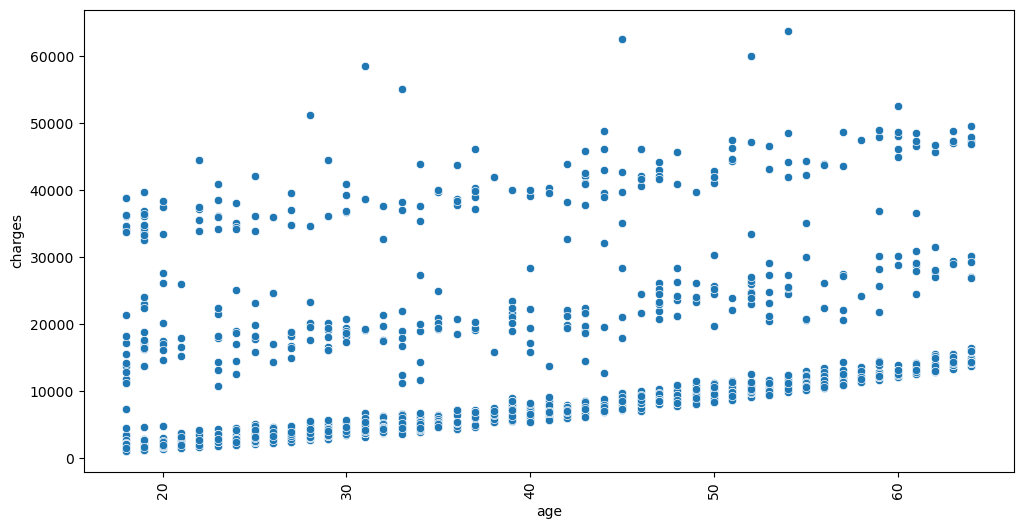

In [252]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df['age'], y = df['charges'])
plt.xticks(rotation='vertical')
plt.show()

## we find high corellation between age and charges

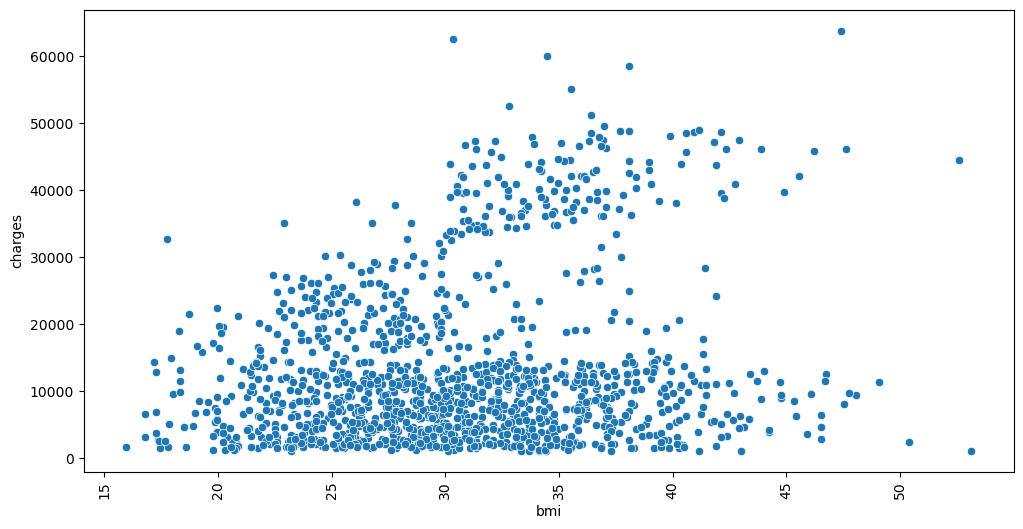

In [254]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df['bmi'], y = df['charges'])
plt.xticks(rotation='vertical')
plt.show()

## another high corellation between bmi and charges

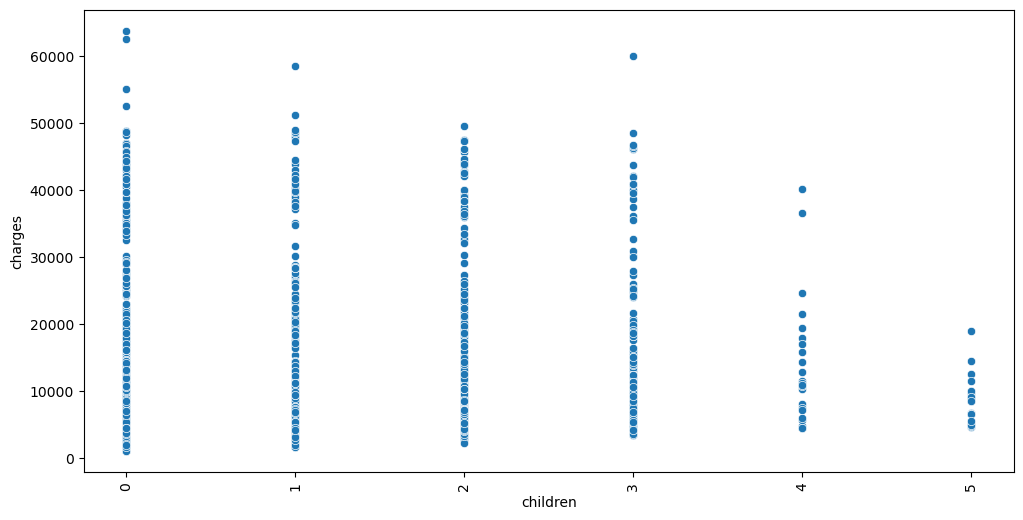

In [256]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df['children'], y = df['charges'])
plt.xticks(rotation='vertical')
plt.show()

## weak correlation between children and charges

<Axes: >

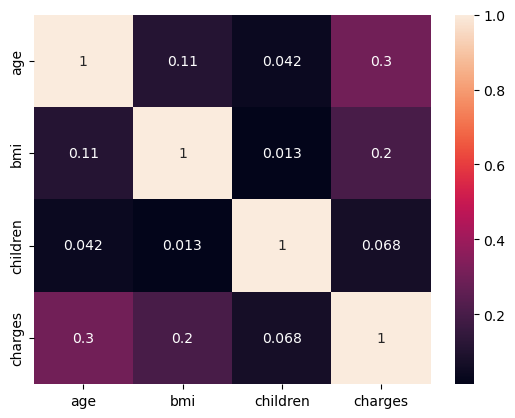

In [203]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix , annot= True) 

## Check Outliers

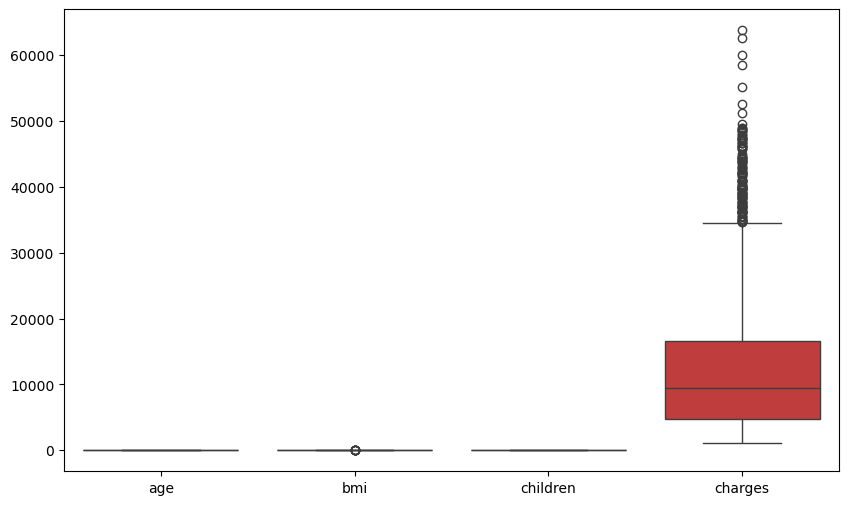

In [204]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

In [205]:
columns_num = df.select_dtypes(include=['number']).columns
Columns_without_charges =columns_num[:-1]
Columns_without_charges

Index(['age', 'bmi', 'children'], dtype='object')

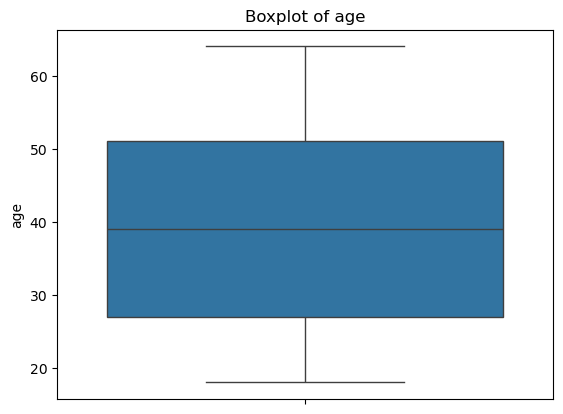

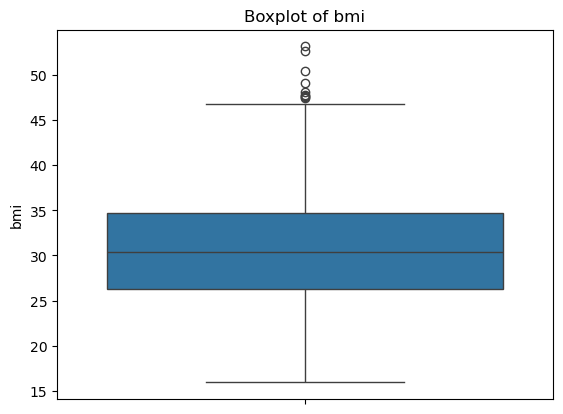

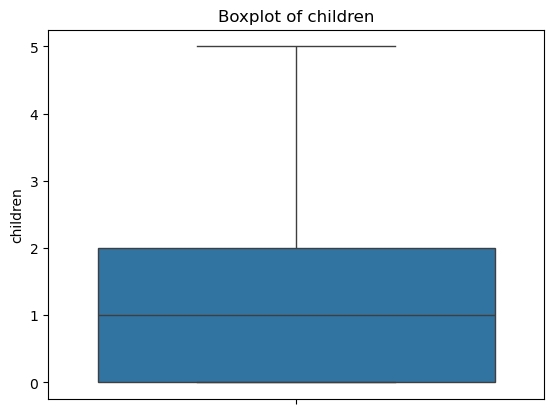

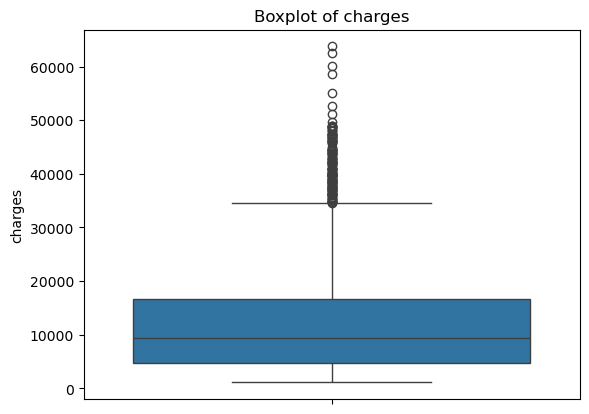

<Figure size 640x480 with 0 Axes>

In [206]:
for col in columns_num:
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    
plt.tight_layout(pad=0.9)
plt.show()

# Encoding

In [211]:
df_dumm = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)
df_dumm.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# scaler

In [212]:
x = df_dumm.drop("charges" , axis=1 )
y = df_dumm["charges"]

In [213]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=42)

In [214]:
scaler =  StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

## Modeling

In [215]:
model = LinearRegression()

In [216]:
model.fit(x_train, y_train)

LinearRegression()

In [217]:
y_pred = model.predict(x_test)

In [218]:
mse = mean_squared_error( y_pred , y_test)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 33780509.574791655
R-squared: 0.769611805436901


## Try another model DecisionTreeRegressor

In [219]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [220]:
y_pred2 = model2.predict(x_test)

In [221]:
mse = mean_squared_error( y_pred2 , y_test)
r2 = r2_score(y_test, y_pred2)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 38253587.909510106
R-squared: 0.7391047333220349


## RandomForestRegressor

In [222]:
model3 = RandomForestRegressor(random_state=42)

In [223]:
from sklearn.model_selection import GridSearchCV
param_grid = {
      "n_estimators":[50,70,90,100],
    "max_depth":[3,5,7,9,11,13,15]
}
grid_search = GridSearchCV(model3 , param_grid=param_grid)

In [224]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [50, 70, 90, 100]})

In [225]:
print(grid_search.best_params_)

{'max_depth': 3, 'n_estimators': 50}


In [226]:
model3 = grid_search.best_estimator_

In [227]:
y_pred3 = model3.predict(x_test)

In [228]:
print("R2 score : ", r2_score(y_test , y_pred3))

R2 score :  0.8599071109599965


In [229]:
importance = model3.feature_importances_

In [230]:
feature_import = pd.DataFrame({
    "features": x.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)


In [231]:
feature_import

,features,Importance
4,smoker_yes,0.707017
1,bmi,0.173546
0,age,0.117071
2,children,0.002366
3,sex_male,0.000000
5,region_northwest,0.000000
6,region_southeast,0.000000
7,region_southwest,0.000000


## Drop features

In [232]:
df_dumm.drop(["region_northwest" ,"region_southeast" ,"region_southwest"] , inplace= True ,axis=1 )

In [233]:
print(df_dumm.columns)

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')


In [234]:
df_dumm.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [235]:
x_new = df_dumm.drop("charges" , axis=1 )
y_new = df_dumm["charges"]

In [236]:
x_train_new , x_test_new, y_train_new , y_test_new = train_test_split(x_new,y_new,test_size=0.3 , random_state=42)

In [237]:
scaler =  StandardScaler()
x_train_new = scaler.fit_transform(x_train_new)
x_test_new  = scaler.transform(x_test_new)

In [238]:
model4 = RandomForestRegressor(random_state=42)
from sklearn.model_selection import GridSearchCV
param_grid = {
      "n_estimators":[50,70,90,100],
    "max_depth":[3,5,7,9,11,13,15]
}
grid_search = GridSearchCV(model4 , param_grid=param_grid)

In [239]:
grid_search.fit(x_train_new,y_train_new)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'n_estimators': [50, 70, 90, 100]})

In [240]:
print(grid_search.best_params_)

{'max_depth': 3, 'n_estimators': 50}


In [241]:
model4 = grid_search.best_estimator_

In [242]:
y_pred4 = model4.predict(x_test_new)

In [243]:
print("R2 score : ", r2_score(y_test , y_pred4))

R2 score :  0.8599071109599965
